rohan 19btrcr011

# Linear Regression using Gradient Descent  




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as csv

data = pd.read_csv('data.csv')

In [3]:
data.head()

,mobile,sales
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [4]:
# Looking the shape of the data
data.shape

(100, 2)

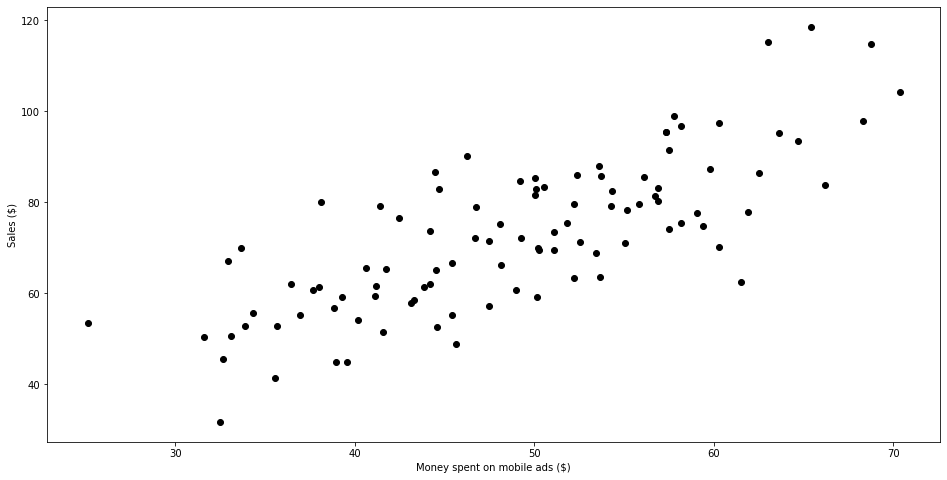

In [5]:
plt.figure(figsize=(16, 8)) ## Plotting TV ad vs Sales
plt.scatter(
    data['mobile'],
    data['sales'],
    c='black'
)
plt.xlabel("Money spent on mobile ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
training, testing =train_test_split(data, test_size= 0.30, random_state=24)

As you can see, there is a clear positive relationship between the amount spent on mobile ads and sales

In [7]:
training

,mobile,sales
49,64.707139,93.576119
9,52.550014,71.300880
69,35.678094,52.721735
23,41.575643,51.391744
74,70.346076,104.257102
...,...,...
17,60.297327,97.379897
87,50.282836,69.510503
64,33.644706,69.899682
3,47.475640,71.546632


# Implementing Simple linear regression using Gradient Descent

In [8]:
# Building the model
m = 0
c = 0

L = 0.01  # The learning Rate
epochs = 5  # The number of iterations to perform gradient descent

n = float(len(data['mobile'])) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*(data['mobile']) + c  # The current predicted value of Y
    D_m = (-2/n) * sum(data['mobile'] * (data['sales'] - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(data['sales'] - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

410917957.7002709 8076467.286673318


# Prediction

Let’s visualize how the line(prediction line) fits the data

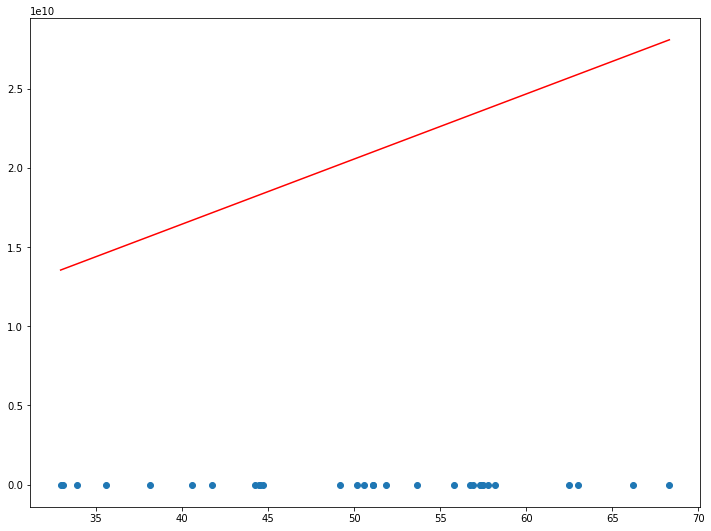

In [9]:
# Making predictions
Y_pred = m*(testing['mobile']) + c

plt.scatter(testing['mobile'],testing['sales'])
plt.plot([min(testing['mobile']), max(testing['mobile'])], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

# From the above graph using Gradient DescentPrediction line is the bewst fit line for L=0.0001 and epochs=1000

# Assessing the efficiency and Performance of the model

To see if the model is any good, we need to look at the R² value and the p-value from each coefficient.

In [11]:
X = testing['mobile'] ## Assign TV ad value to X
y = testing['sales'] ## assign sales values to y

X2 = sm.add_constant(X)# Assign stat model  constant to X2
est = sm.OLS(y, X2) # Build Ordinary least square 
est2 = est.fit() #Fitting OLS Regression
print(est2.summary()) # Printing OLS Results

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     33.45
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           3.28e-06
Time:                        10:27:46   Log-Likelihood:                -113.61
No. Observations:                  30   AIC:                             231.2
Df Residuals:                      28   BIC:                             234.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8433     10.655      1.581      0.1

Looking at both coefficients, we have a p-value that is very low (although it is probably not exactly 0). This means that there is a correlation between these coefficients and the target (Sales)

Then, looking at the R² value, we have 0.599. Therefore, about 60% of the variability of sales is explained by the amount spent on by advertising mobile. This is okay, but definitely not the best we can to accurately predict the sales. 